In [1]:

pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=2c36ed39ca32794707e885cbd51b255d24a2f257e5f3c84e2f8d7c6c6c77ce37
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
height = ctrl.Antecedent(np.arange(1.09, 1.61, 0.01), 'height')
weight = ctrl.Antecedent(np.arange(18, 45.1, 0.01), 'weight')
age = ctrl.Antecedent(np.arange(5, 14.1, 0.01), 'age')
gender = ctrl.Antecedent(np.arange(0, 3, 1), 'gender')
size = ctrl.Consequent(np.arange(0, 4.1, 1), 'size')

In [5]:
height['short'] = fuzz.trimf(height.universe,[1.09,1.09,1.24])
height['medium'] = fuzz.trimf(height.universe,[1.15 ,1.24,1.38])
height['tall'] = fuzz.trimf(height.universe,[1.40,1.5,1.64])
weight['light'] = fuzz.trimf(weight.universe,[18,18,22])
weight['medium'] = fuzz.trimf(weight.universe,[20,25,30])
weight['heavy'] = fuzz.trapmf(weight.universe,[30,38,45,45])
age['child'] = fuzz.trimf(age.universe,[5,5,7])
age['youth'] = fuzz.trimf(age.universe,[6,8,10])
age['teen'] = fuzz.trimf(age.universe,[9,12,14])
gender['boy'] = fuzz.trapmf(gender.universe,[0,0,0,1])
gender['girl'] = fuzz.trapmf(gender.universe,[1,2,2,2])
size['S']=fuzz.trimf(size.universe,[0,0,1])
size['M']=fuzz.trimf(size.universe,[1,1,2])
size['L']=fuzz.trimf(size.universe,[2,2,3])
size['XL']=fuzz.trimf(size.universe,[3,4,4])


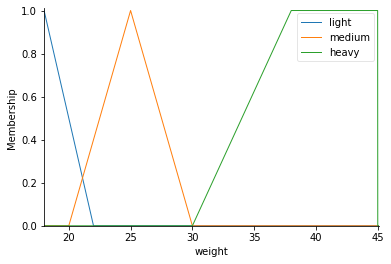

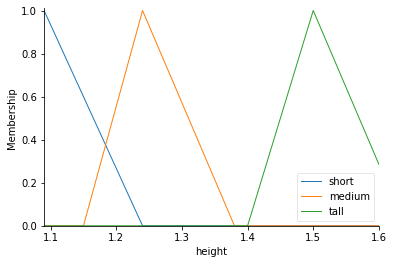

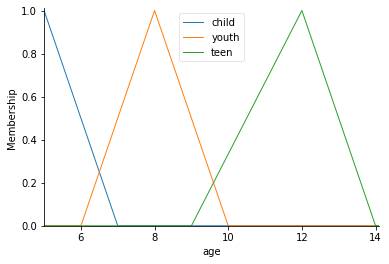

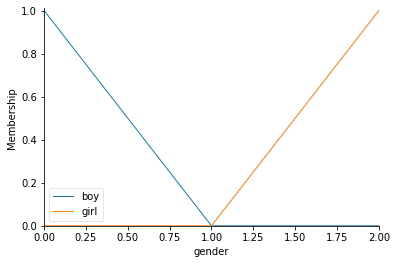

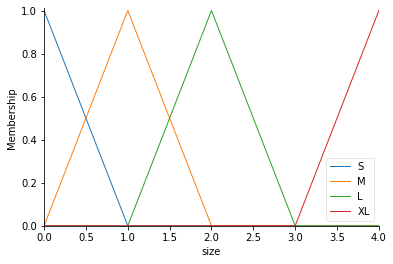

In [6]:
weight.view()
height.view()
age.view()
gender.view()
size.view()

0.4367521367521367


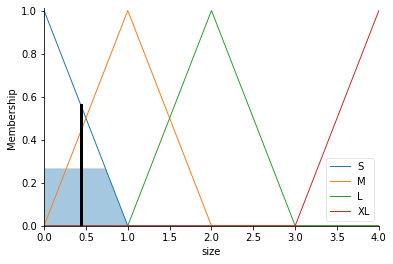

In [7]:
rule1 = ctrl.Rule(height['short'] & weight['light'] & age['child'] & gender['girl'], size['S'])
rule2 = ctrl.Rule(height['short'] & weight['light'] & age['youth'] & gender['boy'], size['M'])
rule3 = ctrl.Rule(height['medium'] & weight['medium'] & age['teen'] & gender['girl'], size['L'])
rule4 = ctrl.Rule(height['tall'] & weight['heavy'] & age['teen'] & gender['boy'], size['XL'])
size_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4])
Size=ctrl.ControlSystemSimulation(size_ctrl)
Size.input['height']=1.2
Size.input['weight']=20
Size.input['gender']=2
Size.input['age']=6
Size.compute()
print(Size.output['size'])
size.view(sim=Size)